In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('images/grains.jpg')
img.shape


(607, 775, 3)

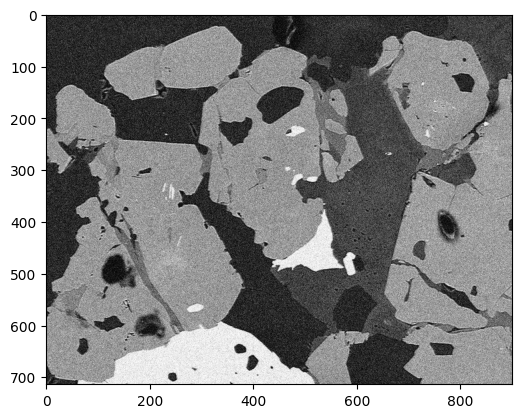

(714, 901)

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.imread("images/BSE_Google_noisy.jpg", 0)
plt.imshow(gray,cmap=plt.cm.gray)
plt.show()
gray.shape

In [5]:
gray = np.float32(gray)

- What are features, detectors, and keypoints?
- Features in an image are unique regions that the computer can easily tell apart. Corners are good examples of features. Finding these unique features is called feature detection.
- Once features are detected we need to find similar ones in a different image.This means we need to describe the features. 
- Once you have the features and its description, you can find same features in all images and align them, stitch them or do whatever you want.

Harris corner detector is a good example of feature detector. 

- Keypoints are the same thing as points of interest.They are spatial locations, or points in the image that define what is interesting or what stand out in the image.
- The reason why keypoints are special is because no matter how the image changes,whether the image rotates, shrinks/expands, is translated, or distorted you should be able to find the same keypoints in this modified image when comparing with the origin

Each keypoint that you detect has an associated descriptor that accompanies it.
SIFT, SURF and ORB all detect and describe the keypoints.


- Descriptors are primarily concerned with both the scale and the orientation of the keypoint.

- e.g. run ORB and draw keypoints with rich keypoints. some of these points have a different circle radius. These deal with scale.The larger the "circle", the larger the scale was that the point was detected at.

- Also, there is a line that radiates from the centre of the circle to the edge. This is the orientation of the keypoint, which we will cover next

- Usually when we want to detect keypoints, we just take a look at the locations. 
- However, if you want to match keypoints between images,  then you definitely need the scale and the orientation to facilitate this.

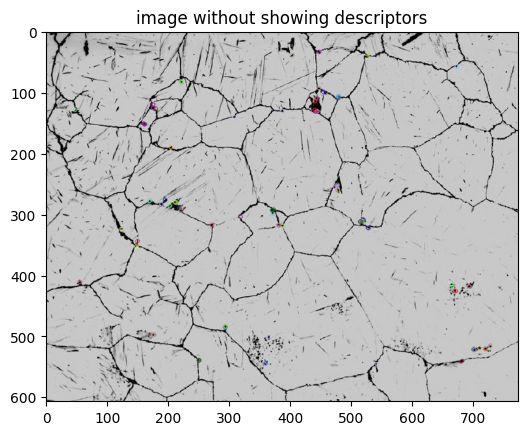

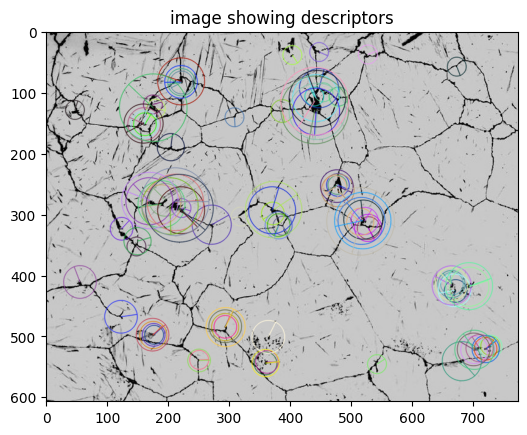

In [6]:
#ORB
# Oriented FAST and Rotated BRIEF
# An efficient alternative to SIFT or SURF
# ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor
img = cv2.imread('images/grains.jpg', 0)
orb = cv2.ORB_create(100)

kp, des = orb.detectAndCompute(img, None)

# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, flags=None)
plt.imshow(img2,cmap=plt.cm.gray)
plt.title("image without showing descriptors")
plt.show()
# Now, let us draw with rich key points, reflecting descriptors. 
# Descriptors here show both the scale and the orientation of the keypoint.
img2 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2,cmap=plt.cm.gray)
plt.title("image showing descriptors")
plt.show()

# Image Registration

- it is  used for distortion correction or alignment
- for this task we will use homography. 

In [7]:
im1 = cv2.imread('images/monkey_distorted.jpg')         
im2 = cv2.imread('images/monkey.jpg') 

img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


In [9]:
# Initiate ORB detector
orb = cv2.ORB_create(50)  #Registration works with at least 50 points

In [10]:
# find the keypoints and descriptors with orb
#kp1 --> list of keypoints
kp1, des1 = orb.detectAndCompute(img1, None) 
kp2, des2 = orb.detectAndCompute(img2, None)

In [11]:
#Brute-Force matcher takes the descriptor of one feature in first set and is 
#matched with all other features in second set using some distance calculation.
# create Matcher object

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

In [12]:
# Match descriptors.
matches = matcher.match(des1, des2, None)  #Creates a list of all matches, just like keypoints

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#Like we used cv2.drawKeypoints() to draw keypoints, 
img3 = cv2.drawMatches(im1,kp1, im2, kp2, matches[:10], None)


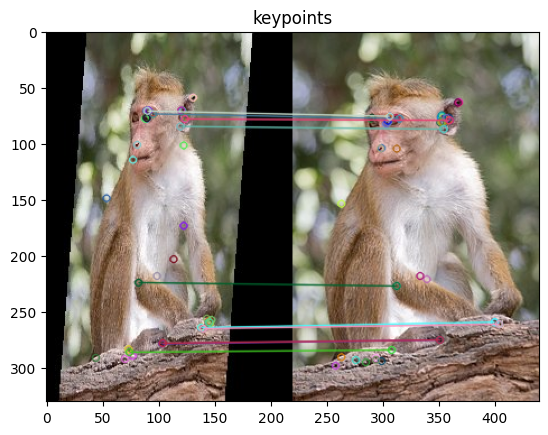

In [19]:
img3= cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.title("keypoints")
plt.show()

Image Registration

- now we extract the location of good matches (RANSAC)
- RANSAC is abbreviation of RANdom SAmple Consensus, it can be considered as outlier rejection method for keypoints.


In [14]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)  #Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = kp1[match.queryIdx].pt    #gives index of the descriptor in the list of query descriptors
   points2[i, :] = kp2[match.trainIdx].pt    #gives index of the descriptor in the list of train descriptors

In [15]:
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

In [16]:
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))  #Applies a perspective transformation to an image.

# Before

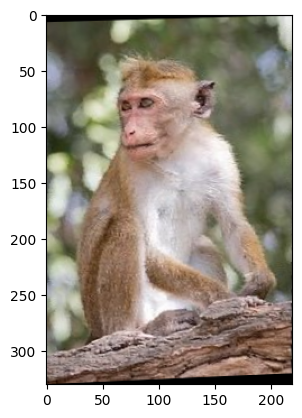

In [23]:
plt.imshow(im1)
plt.show()

# Result

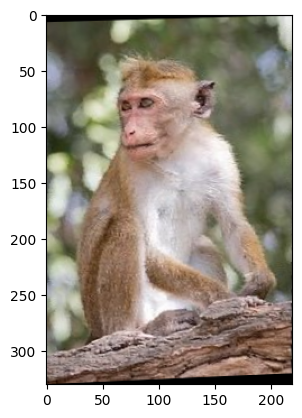

In [25]:
im1Reg_rgb = cv2.cvtColor(im1Reg, cv2.COLOR_BGR2RGB)
plt.imshow(im1Reg_rgb)
plt.show()